# Derivados Financieros 2021 - Clase 5

Diferencias Finitas


# 2) Metodo de diferencias finitas

In [1]:
import sys
sys.path.append('..')
from Codigo.opcion_americana_fd import opcion_americana_fd
from Codigo.opcion_europea_fd import opcion_europea_fd

from scipy.interpolate import interp1d

opcion_europea_fd
Def
    Calculador del precio de una opcion Europea con el modelo de Diferencias Finitas (metodo explicito)
Inputs
    - tipo : string - Tipo de contrato entre ["CALL","PUT"]
    - S : float - Spot price del activo
    - K : float - Strike price del contrato
    - T : float - Tiempo hasta la expiracion (en años)
    - r : float - Tasa 'libre de riesgo' (anualizada)
    - sigma : float - Volatilidad implicita (anualizada)
    - div : float - Tasa de dividendos continuos (anualizada)
Outputs
    - precio_FD: float - Precio del contrato

In [19]:
tipo = "C"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0.0

In [20]:
#Hadrcode de la grilla de diferencias finitas
M = 160
N = 1600

#M = 6
#N = 4


dS = 2 * S / M
dt = T / N

In [21]:
# Grilla de spots y tiempos
S_vec = np.linspace(0, 2*S, M+1)
t_vec = np.linspace(0, T, N+1)



In [22]:
# Armado de la matriz tridiagonal
j = np.arange(1,M)
j2 = np.zeros(M-1)
aj = np.zeros(M-1)
bj = np.zeros(M-1)
cj = np.zeros(M-1)

for index in range(0,M-1):
    sigma2 = sigma*sigma
    j2[index] = j[index] * j[index]
    aj[index] = 0.5 * dt * (sigma2 * j2[index]- (r-div) * j[index])
    bj[index] = 1-dt * (sigma2 * j2[index] + r)
    cj[index] = 0.5 * dt * (sigma2 * j2[index] + (r-div) * j[index])

In [23]:
# Matriz tridiagonal

A = np.diag(bj)
for index in range(0, M - 2):
    A[index + 1, index] = aj[index + 1]  # terms below the diagonal
    A[index, index + 1] = cj[index]  # terms above the diagonal
    


In [24]:
# Matriz de precios de la opcion
opcion_precios = np.zeros((M+1,N+1)) #V

In [25]:
#Condiciones de contorno

# Condicion final - Payoff

if tipo == "C":
    opcion_precios[:,-1] = np.maximum(S_vec - K, 0)
elif tipo == "P":
    opcion_precios[:,-1] = np.maximum(K - S_vec, 0)

In [26]:
# Casos limite en S=0 y S~inf

if tipo == "C":
    opcion_precios[0, :] = 0
    opcion_precios[-1, :] = S_vec[-1]*np.exp(-div*np.flip(t_vec)) - K * np.exp(-r*np.flip(t_vec))
elif tipo == "P":
    opcion_precios[0, :] = K * np.exp(-r * np.flip(t_vec))
    opcion_precios[-1, :] = 0 #K * np.exp(-r * np.flip(t_vec))

In [27]:
    
# Calculo en el interior
# variable auxiliar para sumar en la primer y ultimo fila
constantes_bordes = np.array((aj[0], cj[-1]))
for i in list(reversed(range(0,N))):

    opcion_precios[1:M,i] = A @ opcion_precios[1:M,i+1]
    #Offset the first and last terms
    opcion_precios[[1,M-1],i] = opcion_precios[[1,M-1],i] + constantes_bordes * opcion_precios[[0, M],i+1];

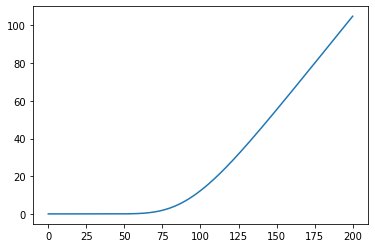

In [28]:
from matplotlib import pyplot as plt

plt.plot(S_vec,opcion_precios[:,0])

plt.show()

In [29]:
#En este punto ya esta TODA la grilla, ahora calculo lo requerido

f = interp1d(S_vec,opcion_precios[:,0])

S=100
precio_FD = float(f(S))




precio_FD


12.333802587232636

In [30]:
from mpl_toolkits import mplot3d

X, Y = np.meshgrid(t_vec, S_vec)
Z = opcion_precios

In [31]:
print('X', np.shape(X))
print('Y', np.shape(Y))
print('Z', np.shape(Z))

X (161, 1601)
Y (161, 1601)
Z (161, 1601)


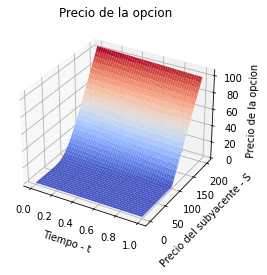

In [32]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')#, edgecolor='none')#rstride=1, cstride=1,
                

ax.set_title('Precio de la opcion');
ax.set_xlabel('Tiempo - t')
ax.set_ylabel('Precio del subyacente - S')
ax.set_zlabel('Precio de la opcion')

plt.show()